In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 

Veri dosyasını pandas kütüphanesi ile Dataframe dönüştürme

In [92]:
df = pd.read_csv('CC GENERAL.csv')

In [93]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Özgün olan özelliği dataframeden çıkarmak

In [94]:
df.drop('CUST_ID',axis=1,inplace=True)

In [95]:
df.shape

(8950, 17)

Detaylı bir şekilde dataframe incelenmesi

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [97]:
df.describe().T.style.background_gradient(cmap = 'Spectral')

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.000000,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.138560
BALANCE_FREQUENCY,8950.000000,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,8950.000000,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.570000
ONEOFF_PURCHASES,8950.000000,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.250000
INSTALLMENTS_PURCHASES,8950.000000,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.000000
CASH_ADVANCE,8950.000000,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.211760
PURCHASES_FREQUENCY,8950.000000,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.000000,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.000000,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.000000,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.500000


Eksik verileri bulup, yerine eksik oldukları özelliğin ortalamasını atamak

In [98]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [99]:
df['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [100]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [101]:
df['CREDIT_LIMIT'].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [102]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)

In [103]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Dataframe görselleştirilmesi

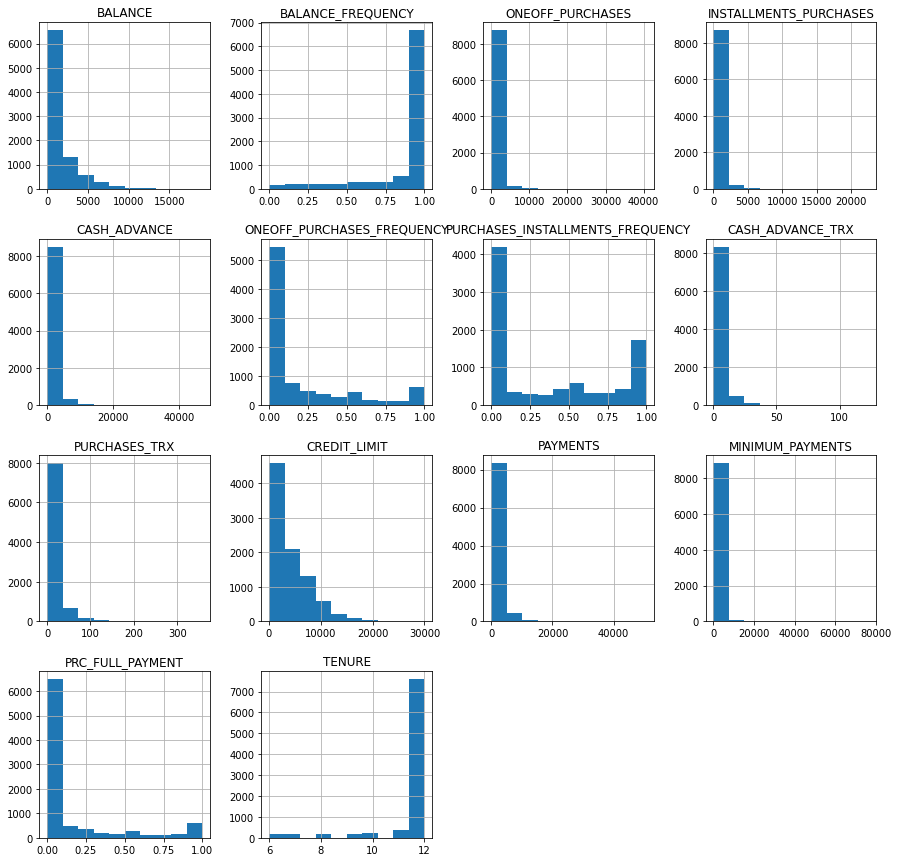

In [134]:
df.hist(figsize=(15,15))
plt.show()

Korelasyon incelenmesi ve heatmap ile gösterilmesi

In [105]:
corr=df.corr()
corr

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


<AxesSubplot:>

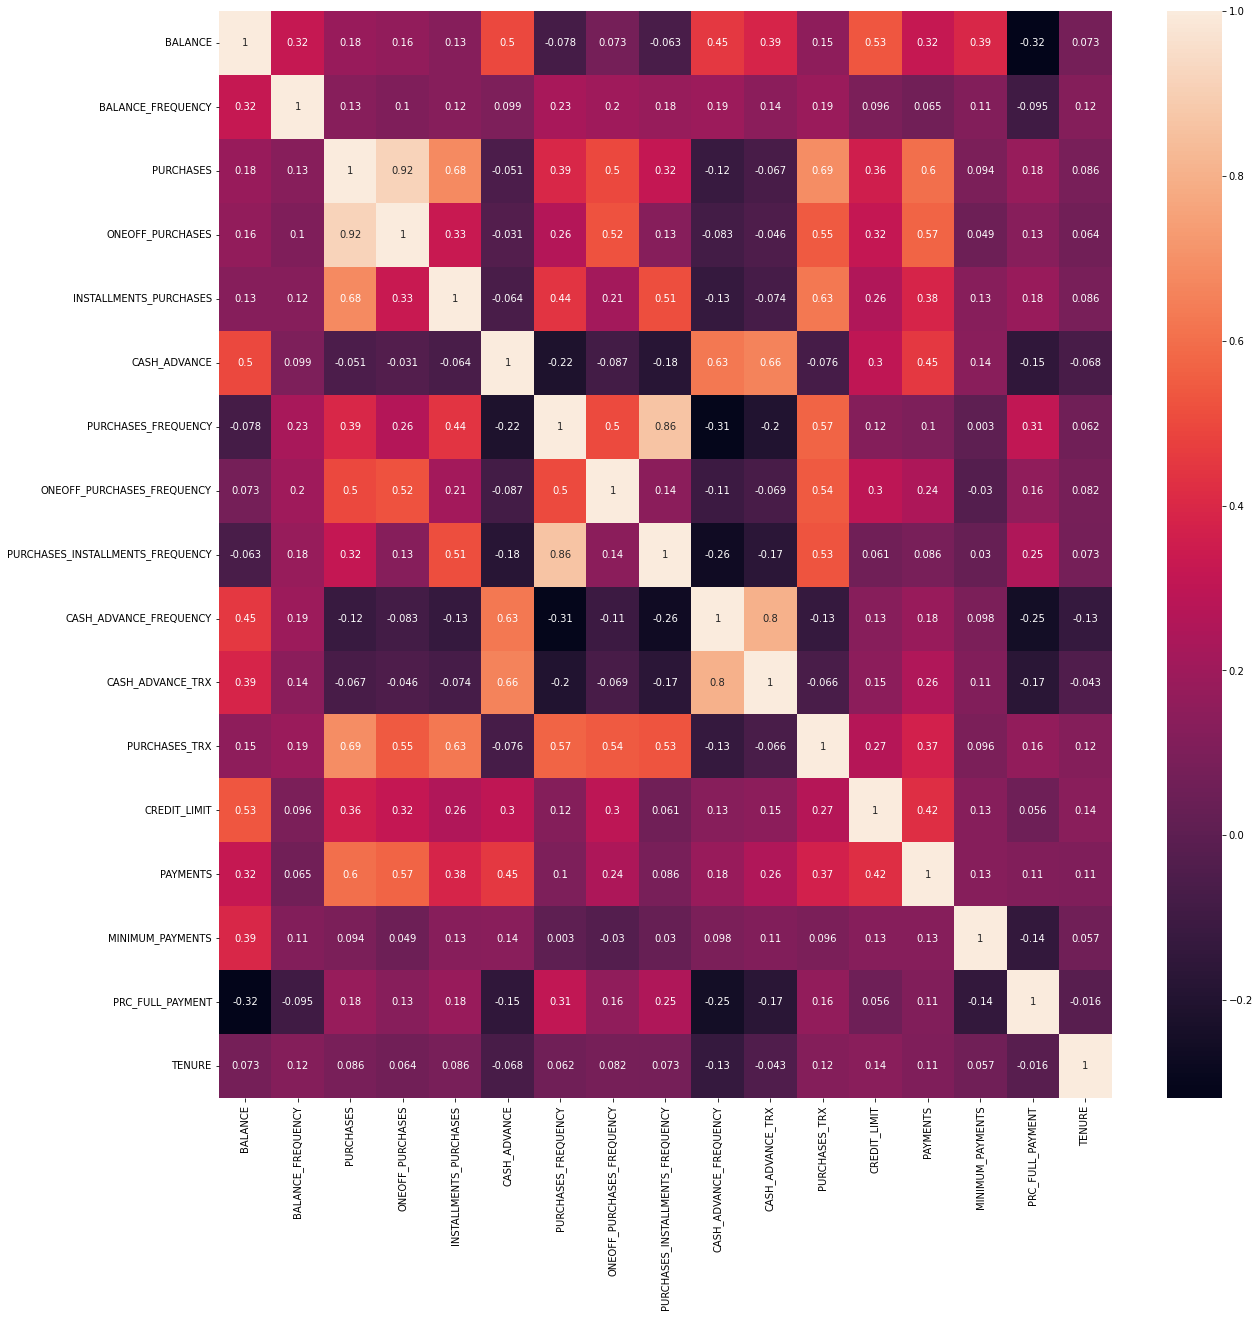

In [106]:
corr_index=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[corr_index].corr(),annot=True)

Yüksek korelasyon değerine sahip olan özelliklerin çıkarılması

In [107]:
df.drop(['PURCHASES','PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY'],axis=1,inplace=True)

In [108]:
df.shape

(8950, 14)

In [109]:
df.head(20)

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,0.00,95.40,0.000000,0.000000,0.083333,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.000000,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,0.00,1333.28,0.000000,0.000000,0.583333,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,6402.63,688.38,0.000000,1.000000,1.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,0.00,436.20,0.000000,0.000000,1.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,661.49,200.00,0.000000,0.083333,0.250000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,0.00,0.000000,0.166667,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


Z-score ile aykırı verilerin elenmesi

In [110]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

       BALANCE  BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0     0.731989           0.249434          0.356934                0.349079   
1     0.786961           0.134325          0.356934                0.454576   
2     0.447135           0.518084          0.108889                0.454576   
3     0.049099           1.016953          0.546189                0.454576   
4     0.358775           0.518084          0.347294                0.454576   
...        ...                ...               ...                     ...   
8945  0.737950           0.518084          0.356934                0.132643   
8946  0.742423           0.518084          0.356934                0.122823   
8947  0.740398           0.185477          0.356934                0.294893   
8948  0.745174           0.185477          0.356934                0.454576   
8949  0.572575           0.889033          0.301732                0.454576   

      CASH_ADVANCE  ONEOFF_PURCHASES_FREQUENCY  \
0

In [111]:
threshold = 3
print(np.where(z > 3))
df1 = df[(z < 3).all(axis=1)]
df1.shape

(array([   6,   19,   20, ..., 8947, 8948, 8949], dtype=int64), array([ 2, 11, 11, ..., 13, 13, 13], dtype=int64))


(7507, 14)

StandardScaler ile ölçeklendirilmesi

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df1)
X.shape

(7507, 14)

In [113]:
df1.head()

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,0.00,95.4,0.000000,0.000000,0.083333,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.000000,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


KMeans yöntemi ile kümeleme ve Elbow metodu ile n_clusters parametresinin bulunması

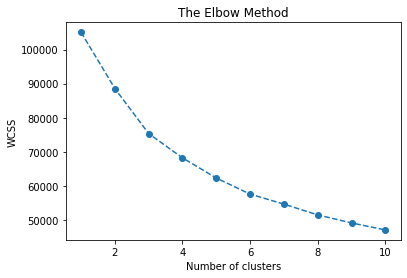

In [114]:
from sklearn.cluster import KMeans
wcss=[]
cluster_range = range(1,11)
for i in cluster_range:
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(cluster_range,wcss,marker="o",linestyle="--")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [115]:
clusters_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_inertia':wcss})
clusters_df

,num_clusters,cluster_inertia
0,1,105098.000000
1,2,88566.824543
2,3,75324.710131
3,4,68188.947236
4,5,62258.360211
5,6,57541.543880
6,7,54588.518908
7,8,51431.803050
8,9,49063.288398
9,10,47021.109171


n_clusters değerinin 3 alınması

In [116]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [117]:
y_kmeans

array([1, 0, 2, ..., 1, 1, 1])

2. satırdaki verinin test edilmesi

In [118]:
test = kmeans.predict([[3202.467416,	0.909091,	0.00,	0.0,	6442.945483,	0.000000,	0.000000,	4,	0,	7000.0,	4103.032597,	1072.340217,	0.222222,	12]])
print("bu nokta", test[0],"kümesine aittir")

bu nokta 0 kümesine aittir


In [119]:
df1[y_kmeans == 0].head()

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
15,6886.213231,1.000000,0.00,1611.7,2301.491267,0.000000,0.500000,4,11,8000.0,1993.439277,2109.906490,0.000000,12
16,2072.074354,0.875000,0.00,0.0,2784.274703,0.000000,0.000000,3,0,3000.0,391.974562,376.579631,0.000000,8
24,5368.571219,1.000000,0.00,0.0,798.949863,0.000000,0.000000,4,0,6000.0,1422.726707,1657.002877,0.000000,11
28,7152.864372,1.000000,204.55,182.5,2236.145259,0.166667,0.416667,16,8,10500.0,1601.448347,1648.851345,0.000000,12


Özelliklerin PCA(Principal Component Analysis) yöntemi ile indirgenmesi

In [127]:
labels = kmeans.labels_

In [128]:
from sklearn.decomposition import PCA
pca = PCA(7)
principalComponents = pca.fit_transform(X)
x, y = principalComponents[:, 0], principalComponents[:, 1]
print(principalComponents.shape)

colors = {0: 'red', 1: 'blue', 2: 'green'}

(7507, 7)


In [129]:
final_df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = final_df.groupby(labels)

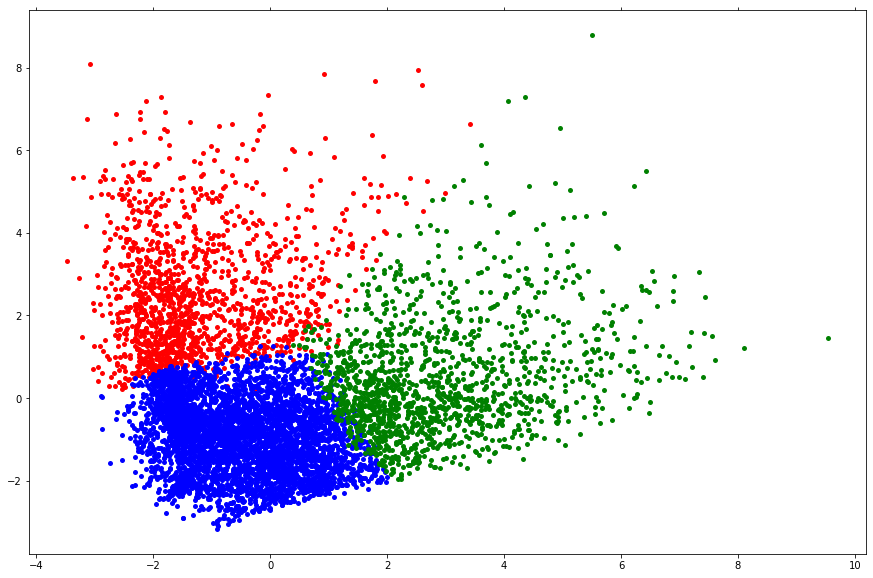

In [133]:
fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
plt.show()